<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-utilizado" data-toc-modified-id="Dataset-utilizado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset utilizado</a></span><ul class="toc-item"><li><span><a href="#Número-de-amostras-e-colunas" data-toc-modified-id="Número-de-amostras-e-colunas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Número de amostras e colunas</a></span></li></ul></li><li><span><a href="#Analisando-rank-das-partidas" data-toc-modified-id="Analisando-rank-das-partidas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analisando rank das partidas</a></span><ul class="toc-item"><li><span><a href="#Distribuições-por-rank" data-toc-modified-id="Distribuições-por-rank-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Distribuições por rank</a></span></li></ul></li><li><span><a href="#Transformando-dados" data-toc-modified-id="Transformando-dados-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transformando dados</a></span><ul class="toc-item"><li><span><a href="#Filtrando-e-removendo-as-colunas-de-game-mode-e-lobby-type" data-toc-modified-id="Filtrando-e-removendo-as-colunas-de-game-mode-e-lobby-type-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Filtrando e removendo as colunas de game mode e lobby type</a></span></li><li><span><a href="#Separar-o-dataset-por-rank" data-toc-modified-id="Separar-o-dataset-por-rank-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Separar o dataset por rank</a></span></li></ul></li><li><span><a href="#Separar-dados-para-treinamento-de-cada-conjunto-de-dados" data-toc-modified-id="Separar-dados-para-treinamento-de-cada-conjunto-de-dados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Separar dados para treinamento de cada conjunto de dados</a></span></li><li><span><a href="#Treinar-modelos-de-classificação" data-toc-modified-id="Treinar-modelos-de-classificação-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Treinar modelos de classificação</a></span><ul class="toc-item"><li><span><a href="#Declarando-modelos" data-toc-modified-id="Declarando-modelos-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Declarando modelos</a></span></li><li><span><a href="#Treinamento" data-toc-modified-id="Treinamento-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Treinamento</a></span></li></ul></li><li><span><a href="#Mostrando-e-salvando-Resultados" data-toc-modified-id="Mostrando-e-salvando-Resultados-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mostrando e salvando Resultados</a></span><ul class="toc-item"><li><span><a href="#Gráfico-de-comparação" data-toc-modified-id="Gráfico-de-comparação-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Gráfico de comparação</a></span></li></ul></li><li><span><a href="#Conclusão-e-próximos-passos" data-toc-modified-id="Conclusão-e-próximos-passos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusão e próximos passos</a></span></li></ul></div>

---
# Experimento 3: Desenvolver modelos para cada rank do Bracket System do dota 2 

**Objetivo do experimento:** Treinar diferentes modelos, onde cada MMR médio da partida se enquadrará em um dos ranks do bracket system:

1. Herald: 0 to 720 MMR.
2. Guardian: 840 to 1560 MMR.
3. Crusader: 1680 to 2400 MMR.
4. Archon: 2520 to 3240 MMR.
5. Legend: 3360 to 4080 MMR.
6. Ancient: 4200 to 4920 MMR.
7. Divine: 5040 to 5760 MMR.
8. Immortal: 6000+ MMR.


**Formato do experimento:** Serão utilizadas algumas variáveis do arquivo ``2021-08-03_working_data.csv``.
1. Os dados serão filtrados por apenas um tipo de `game_mode` e `lobby_type`. Estas duas variáveis não farão parte do modelo;
2. Os dados serão filtrados de acordo com um dos ranks do bracket system;
3. Para cada conjunto de dados
3. Os dados serão divididos em 5 conjuntos, onde será aplicada uma validação cruzada;
4. O passo 1 será repetido 3 vezes com os dados sendo separados aleatoriamente em cada uma das vezes;
5. Será calculada a acurácia média destes 15 conjuntos de teste;

**Os seguintes modelos serão usados:**

- KNN
- Random Forest
- Rede Neural
- XGBoost
- Naive Bayes

**Métrica de avaliação:** Acurácia média dos dados de testes nos 15 conjuntos de dados: 3 validações cruzadas, onde cada validação possui 1 conjunto de teste.

---
**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

**Loading data**

In [2]:
raw_data_path = '../data/raw_data/'
data_path = '../data/working_data/'


file = '2021-08-03_working_data.csv'
df_original = pd.read_csv(data_path+file)

game_mode_df = pd.read_json(raw_data_path+'game_mode.json').T
lobby_type_df = pd.read_json(raw_data_path+'lobby_type.json').T

**Setting output path**

In [3]:
output_savepath = '../3.Experiments_output/03.Exp_Modelo_por_Bracket_System/'

---
## Dataset utilizado

Por se tratar do modelo de baseline os dados referentes à lobby_type e game_mode não foram removidos. 


### Número de amostras e colunas

In [4]:
print('Número total de amostras:', df_original.shape)
print('Colunas:\n', df_original.columns)
df_original.head()

Número total de amostras: (113400, 15)
Colunas:
 Index(['radiant_win', 'avg_mmr', 'duration', 'lobby_type', 'game_mode',
       'Radiant 1', 'Radiant 2', 'Radiant 3', 'Radiant 4', 'Radiant 5',
       'Dire 1', 'Dire 2', 'Dire 3', 'Dire 4', 'Dire 5'],
      dtype='object')


,radiant_win,avg_mmr,duration,lobby_type,game_mode,Radiant 1,Radiant 2,Radiant 3,Radiant 4,Radiant 5,Dire 1,Dire 2,Dire 3,Dire 4,Dire 5
0,0,4104,2147,7,22,94,67,112,5,16.0,14,90,52,1,121
1,0,6421,1526,7,22,72,9,58,89,16.0,79,25,12,119,120
2,1,5062,1323,7,22,111,48,53,101,26.0,31,41,10,88,62
3,1,3943,1956,7,22,41,83,74,123,114.0,109,22,98,107,30
4,0,3515,2087,7,3,59,112,4,41,31.0,88,11,96,110,10


**Informações gerais**

In [5]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
radiant_win,113400.0,0.525688,0.499342,0.0,0.0,1.0,1.0,1.0
avg_mmr,113400.0,4040.530159,474.736865,3500.0,3693.0,3932.0,4247.0,8494.0
duration,113400.0,2329.575855,580.650954,362.0,1956.0,2273.0,2650.0,7408.0
lobby_type,113400.0,5.457910,2.903710,0.0,7.0,7.0,7.0,9.0
game_mode,113400.0,19.296825,6.618990,1.0,22.0,22.0,22.0,22.0
Radiant 1,113400.0,57.951605,37.693319,1.0,25.0,52.0,90.0,135.0
Radiant 2,113400.0,57.736561,37.661342,1.0,25.0,52.0,90.0,135.0
Radiant 3,113400.0,57.960388,37.783283,1.0,25.0,52.0,90.0,135.0
Radiant 4,113400.0,57.856984,37.768054,1.0,25.0,52.0,90.0,135.0
Radiant 5,113399.0,57.733410,37.694819,1.0,25.0,52.0,90.0,135.0


---
## Analisando rank das partidas
**Ajustando Data Frame**

In [6]:
# Setting ranks
df = df_original.copy()

conditions = [
    df['avg_mmr'].ge(0) & df['avg_mmr'].le(720),
    df['avg_mmr'].ge(721) & df['avg_mmr'].le(1560),
    df['avg_mmr'].ge(1561) & df['avg_mmr'].le(2400),
    df['avg_mmr'].ge(2401) & df['avg_mmr'].le(3240),
    df['avg_mmr'].ge(3241) & df['avg_mmr'].le(4080),
    df['avg_mmr'].ge(4081) & df['avg_mmr'].le(4920),
    df['avg_mmr'].ge(4921) & df['avg_mmr'].le(5999),
    df['avg_mmr'].ge(6000) 
]

choices = [1,2, 3, 4, 5, 6, 7, 8]

df['rank'] = np.select(conditions, choices, default=0)

In [7]:
# Column with names
r_names = ['Araut3 (1)', 'Guardião (2)', 'Cruzado (3)',
           'Arconte (4)', 'Lenda (5)', 'Ancestral (6)', 'Divino (7)', 'Imortal (8)']
dict_rank = dict(zip(np.arange(1,9), r_names))

df['rank_name'] = df['rank']
df['rank_name'].replace(dict_rank, inplace=True)

In [8]:
df.head()

,radiant_win,avg_mmr,duration,lobby_type,game_mode,Radiant 1,Radiant 2,Radiant 3,Radiant 4,Radiant 5,Dire 1,Dire 2,Dire 3,Dire 4,Dire 5,rank,rank_name
0,0,4104,2147,7,22,94,67,112,5,16.0,14,90,52,1,121,6,Ancestral (6)
1,0,6421,1526,7,22,72,9,58,89,16.0,79,25,12,119,120,8,Imortal (8)
2,1,5062,1323,7,22,111,48,53,101,26.0,31,41,10,88,62,7,Divino (7)
3,1,3943,1956,7,22,41,83,74,123,114.0,109,22,98,107,30,5,Lenda (5)
4,0,3515,2087,7,3,59,112,4,41,31.0,88,11,96,110,10,5,Lenda (5)


### Distribuições por rank

- 70% das amostras são do rank de lenda
- 20% do rank de ancestral
- menos de 10% dos ranks Arconte, divino e imortal

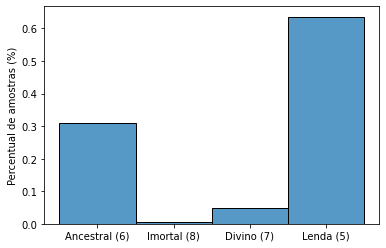

In [9]:
sns.histplot(df['rank_name'], stat='probability')
plt.ylabel('Percentual de amostras (%)')
plt.xlabel('')
plt.show()

---
## Transformando dados
### Filtrando e removendo as colunas de game mode e lobby type

- Apenas game mode = 'game_mode_all_draft'
- Apenas lobby type = 'lobby_type_ranked'

In [10]:
dict_game_mode = dict(zip(game_mode_df['id'], game_mode_df['name']))
dict_lobby_type = dict(zip(lobby_type_df['id'], lobby_type_df['name']))

df['game_mode'].replace(dict_game_mode, inplace=True)
df['lobby_type'].replace(dict_lobby_type, inplace=True)


print('Formato do dataframe:', df.shape)
df = df[df['game_mode'] == 'game_mode_all_draft']
df = df[df['lobby_type'] == 'lobby_type_ranked']


df.drop(columns=['game_mode','lobby_type'], inplace=True)
print('Formato do dataframe após remoção:', df.shape)

Formato do dataframe: (113400, 17)
Formato do dataframe após remoção: (77244, 15)


### Separar o dataset por rank
- Separar o dataset por rank
- Remover a coluna `rank` e `rank_name`

In [11]:
df_lst = [None] * df['rank_name'].nunique()
rank_order_df = df['rank'].unique()

for i, rank in enumerate(rank_order_df):
    print('Data Frame', i, 'de rank:', rank)
    df_lst[i] = df[df['rank'].eq(rank)].copy()

Data Frame 0 de rank: 6
Data Frame 1 de rank: 8
Data Frame 2 de rank: 7
Data Frame 3 de rank: 5


In [12]:
# Removing rank and rank_name column
for i, df_aux in enumerate(df_lst):
    print('-----\nShape dataframe', i , df_aux.shape)
    df_aux.drop(columns=['rank', 'rank_name'], inplace=True)
    print('Shape dataframe', i , df_aux.shape)

-----
Shape dataframe 0 (23636, 15)
Shape dataframe 0 (23636, 13)
-----
Shape dataframe 1 (519, 15)
Shape dataframe 1 (519, 13)
-----
Shape dataframe 2 (3986, 15)
Shape dataframe 2 (3986, 13)
-----
Shape dataframe 3 (49103, 15)
Shape dataframe 3 (49103, 13)


**Relação de dataframe na lista e rank**


In [13]:
print('rank   index lista')
print(rank_order_df, np.arange(5))

rank   index lista
[6 8 7 5] [0 1 2 3 4]


---
## Separar dados para treinamento de cada conjunto de dados
**Função para separação**

In [14]:
def separate_X_y (df):
    colum_names = df.columns

    y_column = ['radiant_win']
    X_columns = set(colum_names) - set(y_column)

    X = df[X_columns]
    y = df[y_column[0]].values

    return X, y

**Separando**

In [15]:
X_lst = [None] * len(rank_order_df)
y_lst = [None] * len(rank_order_df)

for i, df_aux in enumerate(df_lst):
    X_lst[i], y_lst[i] = separate_X_y(df_aux)

In [16]:
display(X_lst[0].head())
print(X_lst[0].shape)

,Radiant 1,Dire 2,Radiant 2,Dire 5,duration,Dire 1,Dire 4,Dire 3,Radiant 5,Radiant 4,avg_mmr,Radiant 3
0,94,90,67,121,2147,14,1,52,16.0,5,4104,112
6,26,14,19,126,2175,114,120,33,98.0,72,4474,1
8,62,14,78,129,2006,84,7,11,46.0,48,4293,20
12,49,63,94,84,2014,120,6,97,99.0,20,4086,135
14,22,89,83,52,1557,3,74,98,70.0,60,4205,100


(23636, 12)


**Configurar os folds para a validação cruzada**

In [17]:
n_folds = 5
repeated_cv = 3
cv = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeated_cv, random_state=1)

---
## Treinar modelos de classificação

### Declarando modelos

In [18]:
model_names = ['KNN', 'Random Forest', 'Rede Neural', 'XGBoost', 'Naive Bayes']

# Declaring models
KNN_model = KNeighborsClassifier(n_neighbors=5)
RdnForest_model = RandomForestClassifier(n_estimators=300)
RNN_model = MLPClassifier()
XGB_model = XGBClassifier(n_estimators=300)
Naive_model = GaussianNB()

models_lst = [KNN_model, RdnForest_model, RNN_model, XGB_model, Naive_model]

### Treinamento
**Função para treinamento**

In [19]:
def train_using_cv(X, y, cv, model_names, models_lst):
    scores = [None] * len(model_names)
    for i, model in enumerate(models_lst):
        print('---------\nTraining model: ', model_names[i])
        scores[i] = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        print('Model '+model_names[i]+ ' mean score:', round(np.mean(scores[i]),2))
        models_lst[i] = model
    
    return scores, models_lst

In [20]:
rank_scores = [None] * len(rank_order_df)
rank_models = [None] * len(rank_order_df)

for i, rank_ord in enumerate(rank_order_df):
    print('########\nModelo do Rank', rank_ord, '########\n')
    rank_scores[i], rank_models[i] = train_using_cv(X_lst[i], y_lst[i], cv, model_names, models_lst)

########
Modelo do Rank 6 ########

---------
Training model:  KNN
Model KNN mean score: 0.5
---------
Training model:  Random Forest
Model Random Forest mean score: 0.52
---------
Training model:  Rede Neural
Model Rede Neural mean score: 0.51
---------
Training model:  XGBoost
Model XGBoost mean score: 0.52
---------
Training model:  Naive Bayes
Model Naive Bayes mean score: 0.53
########
Modelo do Rank 8 ########

---------
Training model:  KNN
Model KNN mean score: 0.51
---------
Training model:  Random Forest
Model Random Forest mean score: 0.52
---------
Training model:  Rede Neural
Model Rede Neural mean score: 0.51
---------
Training model:  XGBoost
Model XGBoost mean score: 0.51
---------
Training model:  Naive Bayes
Model Naive Bayes mean score: 0.5
########
Modelo do Rank 7 ########

---------
Training model:  KNN
Model KNN mean score: 0.51
---------
Training model:  Random Forest
Model Random Forest mean score: 0.51
---------
Training model:  Rede Neural
Model Rede Neural m

---
## Mostrando e salvando Resultados
**Salvando resultados**

In [21]:
def save_score_result(scores, num_rank):
    result_df = pd.DataFrame()
    for i, name in enumerate(model_names):
        series_result = pd.DataFrame(scores[i], columns=[name])
        result_df = pd.concat([result_df, series_result], axis=1)

    print('Saving scores Rank:', num_rank)
    result_df.to_csv(output_savepath+'score_exp03_rank_'+str(num_rank)+'.csv', index=False)

In [22]:
for i, num_rank in enumerate(rank_order_df):
    save_score_result(rank_scores[i], num_rank)

Saving scores Rank: 6
Saving scores Rank: 8
Saving scores Rank: 7
Saving scores Rank: 5


### Gráfico de comparação

In [23]:
plot_rst_mean_rank = []
for i , rank_nbmr in enumerate(rank_order_df):
    plot_rst_mean_rank.append(np.mean(np.array(rank_scores[i])))

pd_result_mean = pd.DataFrame(plot_rst_mean_rank, columns=['Acurácia Média']).T

pd_result_mean.rename(columns={0:'Rank 5', 1:'Rank 6', 2:'Rank 4', 3:'Rank 7', 4:'Rank 8'}, inplace=True)

pd_result_mean = round(pd_result_mean.T,2)
display(round(pd_result_mean.T,2))

,Rank 5,Rank 6,Rank 4,Rank 7
Acurácia Média,0.52,0.51,0.51,0.52


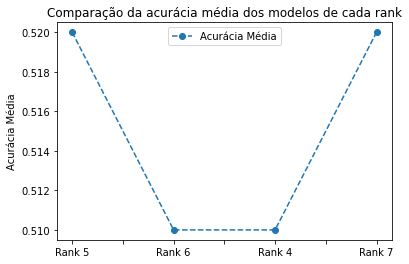

In [24]:
pd_result_mean.plot(ls='--', marker='o', label='Acurácia Média')
plt.ylabel('Acurácia Média')
plt.title('Comparação da acurácia média dos modelos de cada rank')
plt.legend()
plt.savefig(output_savepath+'comparacao_acuracia_modelos_diferentes_rank_exp03')
plt.show()

---
## Conclusão e próximos passos

Nenhum dos modelos obteve um resultado satisfatório. Diante destes resultados conclui-se que as variáveis atuais não conseguem prever quem ganhará uma partida de dota 2. Há dois caminhos a se seguir com o desenvolvimento:

1. Adicionar variáveis referentes ao status de cada herói e seus papéis dentro do jogo;
2. Usar variáveis da própria partida.